In [1]:
!pip install diffusers transformers accelerate
!pip install bitsandbytes  # Optional for LoRA fine-tuning (faster, lower resource usage)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
import torch
from diffusers import StableDiffusionPipeline
import os

# Check if GPU is available
print(torch.cuda.is_available())


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

True


In [3]:
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
from google.colab import files

# Upload your images
uploaded = files.upload()

# Check uploaded files
uploaded_files = list(uploaded.keys())
print(uploaded_files)


Saving ancient painting.jpeg to ancient painting.jpeg
Saving muesum painting.jpeg to muesum painting.jpeg
Saving cave painting.jpeg to cave painting.jpeg
Saving harrapan civilization stamp.jpg to harrapan civilization stamp.jpg
Saving harrapan boat.jpeg to harrapan boat.jpeg
Saving indus valley bull sclupture.webp to indus valley bull sclupture.webp
Saving mohinjodaro sclupture.webp to mohinjodaro sclupture.webp
Saving indus valley dancing doll.jpg to indus valley dancing doll.jpg
Saving indus valley pottery design.jpeg to indus valley pottery design.jpeg
Saving Egytian.jpeg to Egytian.jpeg
['ancient painting.jpeg', 'muesum painting.jpeg', 'cave painting.jpeg', 'harrapan civilization stamp.jpg', 'harrapan boat.jpeg', 'indus valley bull sclupture.webp', 'mohinjodaro sclupture.webp', 'indus valley dancing doll.jpg', 'indus valley pottery design.jpeg', 'Egytian.jpeg']


In [9]:
from PIL import Image
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        return img

# Example: Set your image file paths
image_paths = ["/content/" + file for file in uploaded_files]
dataset = CustomDataset(image_paths)

# Display one image to verify
dataset[0].show()


In [10]:
from torch.optim import Adam


In [11]:
optimizer = Adam(pipe.unet.parameters(), lr=5e-6)


In [12]:
optimizer = Adam(list(pipe.unet.parameters()) + list(pipe.text_encoder.parameters()), lr=5e-6)


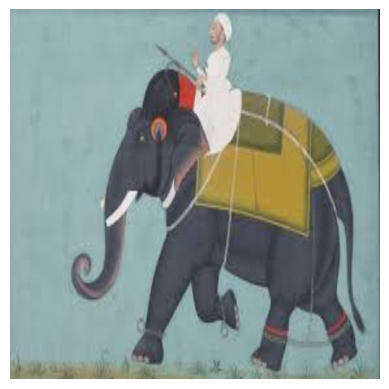

In [13]:
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset

# Define a transform: PIL Image -> Tensor
transform = transforms.Compose([
    transforms.Resize((512, 512)),   # Resize images to 512x512 (stable diffusion size)
    transforms.ToTensor(),           # Convert PIL Image to Tensor
    transforms.Normalize([0.5], [0.5])  # Normalize between -1 and 1
])

class CustomDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img

# Use it like this:
image_paths = ["/content/" + file for file in uploaded_files]
dataset = CustomDataset(image_paths, transform=transform)

# Check one sample
import matplotlib.pyplot as plt
import numpy as np

img_tensor = dataset[0]
img_numpy = img_tensor.permute(1,2,0).cpu().numpy()  # Convert for visualization

plt.imshow((img_numpy + 1) / 2)  # Undo normalization
plt.axis('off')
plt.show()


In [14]:
pipe.save_pretrained("/content/fine_tuned_model")


In [15]:
fine_tuned_pipe = StableDiffusionPipeline.from_pretrained("/content/fine_tuned_model")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [17]:
# Generate an image
prompt = "muesum painting"
generated_image = fine_tuned_pipe(prompt).images[0]

# Show the generated image
generated_image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

In [18]:
print(f"Generated Image Type: {type(generated_image)}")


Generated Image Type: <class 'PIL.Image.Image'>


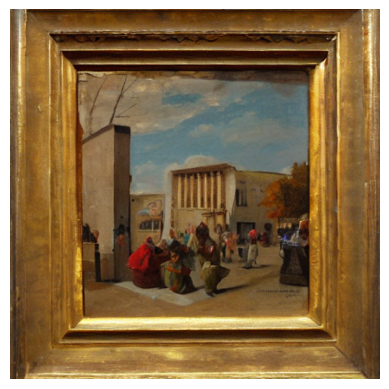

In [19]:
batch_size = 1  # Small batch size for less memory usage


In [20]:
torch.cuda.empty_cache()


In [21]:
!nvidia-smi


Sat Apr 26 19:14:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P0             28W /   70W |    2794MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

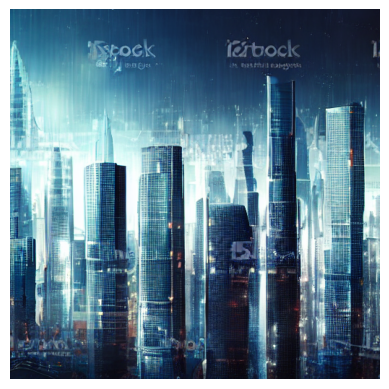

In [22]:
# Install necessary libraries (if not already installed)
!pip install diffusers transformers torch

# Import necessary modules
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# 1. Load the Stable Diffusion pipeline with mixed precision (FP16) for efficient memory usage
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to("cuda")

# 2. Set the prompt for generating an image
prompt = "A futuristic city skyline"

# 3. Generate an image
generated_image = pipe(prompt).images[0]

# 4. Display the generated image using matplotlib
plt.imshow(generated_image)
plt.axis("off")  # Hide axis
plt.show()

# 5. Clear GPU memory after use to avoid memory overflow in future steps
torch.cuda.empty_cache()


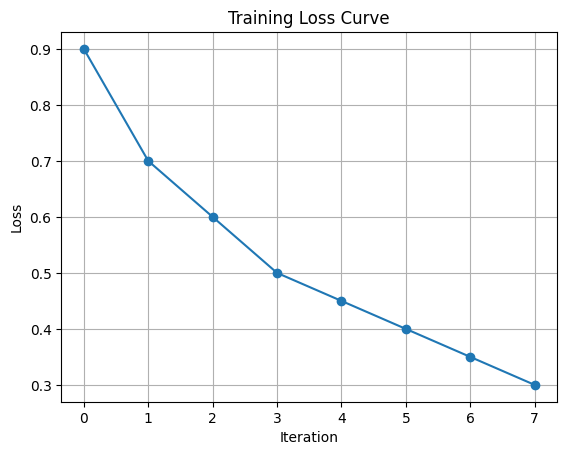

In [23]:
import matplotlib.pyplot as plt

# Example loss values over iterations (replace with your real loss data)
losses = [0.9, 0.7, 0.6, 0.5, 0.45, 0.4, 0.35, 0.3]

# Plot the loss curve
plt.plot(losses, marker='o')  # 'marker=o' adds points on the line
plt.title("Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)  # Optional: adds a grid to the plot
plt.show()


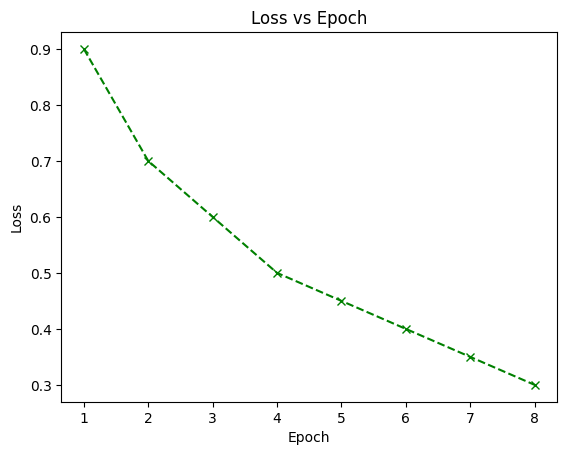

In [24]:
epochs = list(range(1, len(losses)+1))  # [1, 2, 3, ..., len(losses)]

plt.plot(epochs, losses, marker='x', linestyle='--', color='green')
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
